<a href="https://colab.research.google.com/github/lesliederas/5106/blob/main/HW1Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Iteration 1, loss = 1.90040835
Iteration 2, loss = 1.71018638
Iteration 3, loss = 1.62031234
Iteration 4, loss = 1.56201886
Iteration 5, loss = 1.52273494
Iteration 6, loss = 1.48401004
Iteration 7, loss = 1.45554622
Iteration 8, loss = 1.42482784
Iteration 9, loss = 1.41281154
Iteration 10, loss = 1.38063518
Iteration 11, loss = 1.36442978
Iteration 12, loss = 1.34087246
Iteration 13, loss = 1.33277862
Iteration 14, loss = 1.30436424
Iteration 15, loss = 1.28376329
Iteration 16, loss = 1.27403985
Iteration 17, loss = 1.25762349
Iteration 18, loss = 1.24269054
Iteration 19, loss = 1.22323676
Iteration 20, loss = 1.20669525


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


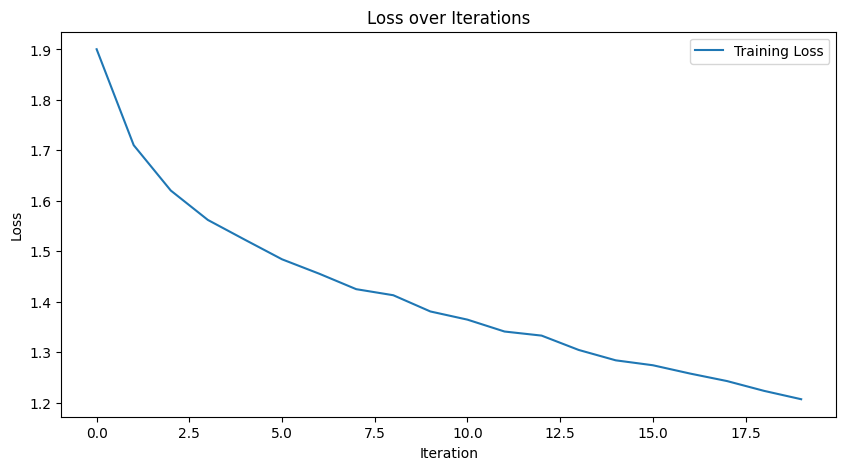

Training Accuracy: 0.581125
Validation Accuracy: 0.4886
Test Accuracy: 0.496

Classification Report:
              precision    recall  f1-score   support

           0     0.4914    0.6250    0.5502      1000
           1     0.6589    0.5660    0.6089      1000
           2     0.4389    0.2660    0.3313      1000
           3     0.3814    0.2700    0.3162      1000
           4     0.3811    0.5400    0.4468      1000
           5     0.3748    0.4790    0.4205      1000
           6     0.6063    0.4220    0.4976      1000
           7     0.5437    0.5780    0.5603      1000
           8     0.5991    0.6710    0.6330      1000
           9     0.5535    0.5430    0.5482      1000

    accuracy                         0.4960     10000
   macro avg     0.5029    0.4960    0.4913     10000
weighted avg     0.5029    0.4960    0.4913     10000

Precision: 0.5029138839033203
Recall: 0.496
F1-Score: 0.4913119238131661


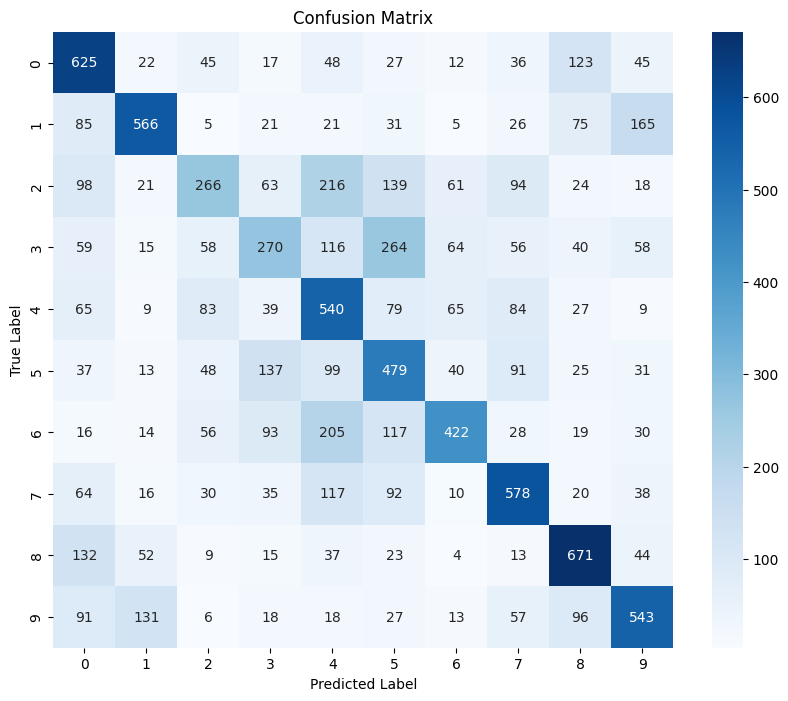

Iteration 1, loss = 1.90375584
Iteration 2, loss = 1.70031336
Iteration 3, loss = 1.61748064
Iteration 4, loss = 1.55624202
Iteration 5, loss = 1.49830275
Iteration 6, loss = 1.46235733
Iteration 7, loss = 1.43530615
Iteration 8, loss = 1.39243018
Iteration 9, loss = 1.37771813
Iteration 10, loss = 1.34028701
Iteration 11, loss = 1.31342464
Iteration 12, loss = 1.29079474
Iteration 13, loss = 1.25205441
Iteration 14, loss = 1.23310272
Iteration 15, loss = 1.20468582
Iteration 16, loss = 1.16915177
Iteration 17, loss = 1.14716114
Iteration 18, loss = 1.11087751
Iteration 19, loss = 1.08078049
Iteration 20, loss = 1.04658081


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


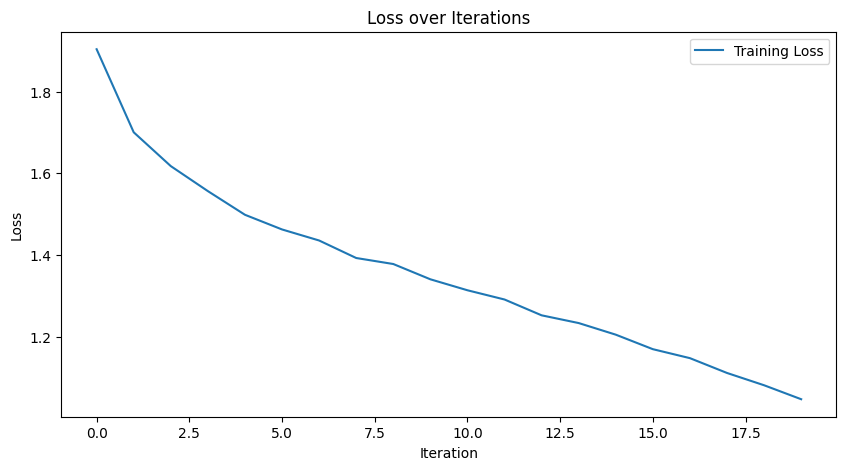


Classification Report for Complex Model:
              precision    recall  f1-score   support

           0     0.5572    0.5800    0.5683      1000
           1     0.6086    0.6390    0.6234      1000
           2     0.4940    0.2900    0.3655      1000
           3     0.3426    0.3190    0.3304      1000
           4     0.4753    0.3760    0.4199      1000
           5     0.4165    0.4860    0.4485      1000
           6     0.4644    0.6450    0.5400      1000
           7     0.5764    0.5320    0.5533      1000
           8     0.6565    0.5580    0.6032      1000
           9     0.4862    0.6180    0.5443      1000

    accuracy                         0.5043     10000
   macro avg     0.5078    0.5043    0.4997     10000
weighted avg     0.5078    0.5043    0.4997     10000

Training Accuracy: 0.6455
Validation Accuracy: 0.4953
Test Accuracy: 0.5043
Complex Model Precision: 0.5077654029168746
Complex Model Recall: 0.5043
Complex Model F1-Score: 0.49968291131187215


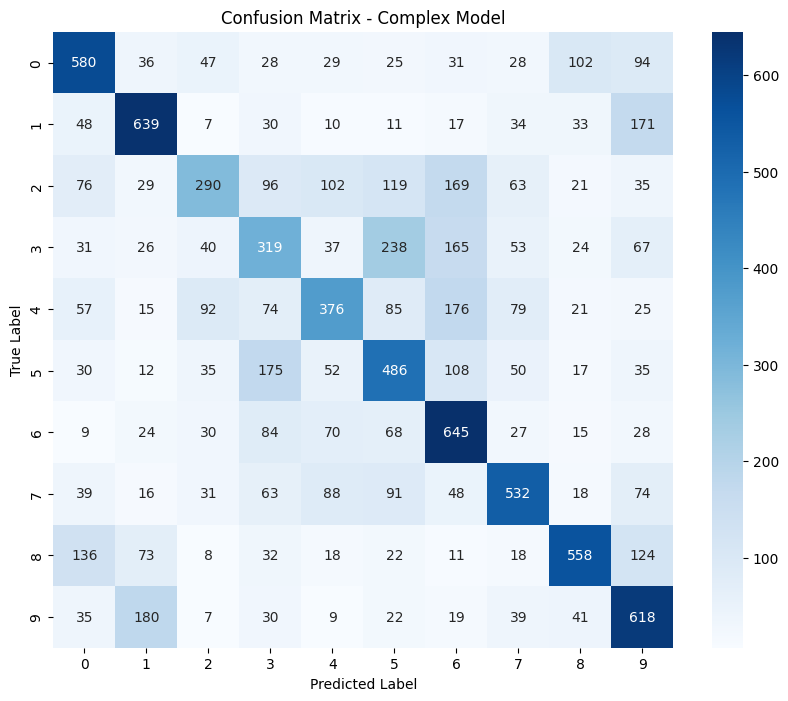

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns
from tensorflow.keras.datasets import cifar10
import joblib

# Load CIFAR-10 Dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Flatten the input data for compatibility with MLPClassifier
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

# Split training data into training and validation sets
x_train_split, x_val_split, y_train_split, y_val_split = train_test_split(
    x_train_flat, y_train, test_size=0.2, random_state=42)

# Build Baseline Model
baseline_model = MLPClassifier(hidden_layer_sizes=(128, 256, 128),
                                activation='relu',
                                solver='adam',
                                max_iter=20,
                                batch_size=128,
                                random_state=42,
                                verbose=True)

# Train the baseline model
baseline_model.fit(x_train_split, y_train_split.ravel())

# Save the trained model
joblib.dump(baseline_model, 'baseline_model.pkl')

# Plot Training Results (Loss Curve)
def plot_training_results(model):
    plt.figure(figsize=(10, 5))
    plt.plot(model.loss_curve_, label='Training Loss')
    plt.title('Loss over Iterations')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_training_results(baseline_model)

# Evaluate Model Performance
train_accuracy = baseline_model.score(x_train_split, y_train_split)
val_accuracy = baseline_model.score(x_val_split, y_val_split)
test_accuracy = baseline_model.score(x_test_flat, y_test)

print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)
print("Test Accuracy:", test_accuracy)

# Predictions
predictions = baseline_model.predict(x_test_flat)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, predictions, digits=4))

# Precision, Recall, F1-Score
precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Part 1.b - Increase Model Complexity
complex_model = MLPClassifier(hidden_layer_sizes=(256, 512, 256, 128),
                               activation='relu',
                               solver='adam',
                               max_iter=20,
                               batch_size=128,
                               random_state=42,
                               verbose=True)

# Train complex model
complex_model.fit(x_train_split, y_train_split.ravel())

# Save the complex model
joblib.dump(complex_model, 'complex_model.pkl')

# Plot results for complex model
plot_training_results(complex_model)

# Evaluate complex model
complex_predictions = complex_model.predict(x_test_flat)

print("\nClassification Report for Complex Model:")
print(classification_report(y_test, complex_predictions, digits=4))
train_accuracy2 = complex_model.score(x_train_split, y_train_split)
val_accuracy2 = complex_model.score(x_val_split, y_val_split)
test_accuracy2 = complex_model.score(x_test_flat, y_test)

print("Training Accuracy:", train_accuracy2)
print("Validation Accuracy:", val_accuracy2)
print("Test Accuracy:", test_accuracy2)


complex_precision = precision_score(y_test, complex_predictions, average='weighted')
complex_recall = recall_score(y_test, complex_predictions, average='weighted')
complex_f1 = f1_score(y_test, complex_predictions, average='weighted')

print("Complex Model Precision:", complex_precision)
print("Complex Model Recall:", complex_recall)
print("Complex Model F1-Score:", complex_f1)

conf_matrix_complex = confusion_matrix(y_test, complex_predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_complex, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix - Complex Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
